In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


from scipy.stats import skew, norm
from pandas_profiling import ProfileReport
from pathlib import Path, PurePath

np.random.seed(42)
%matplotlib inline

In [2]:
data_path = Path().resolve().parent/'data'

train_data = pd.read_csv(data_path/'train.csv')
train_data['ds'] = 'train'
test_data = pd.read_csv(data_path/'test.csv')
test_data['ds'] =  'test'

data = train_data.append([test_data])

target_columns = 'SalePrice'

In [3]:
print(data.shape, train_data.shape, test_data.shape, data['ds'].value_counts())
data.head()

(2919, 82) (1460, 82) (1459, 81) train    1460
test     1459
Name: ds, dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ds
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


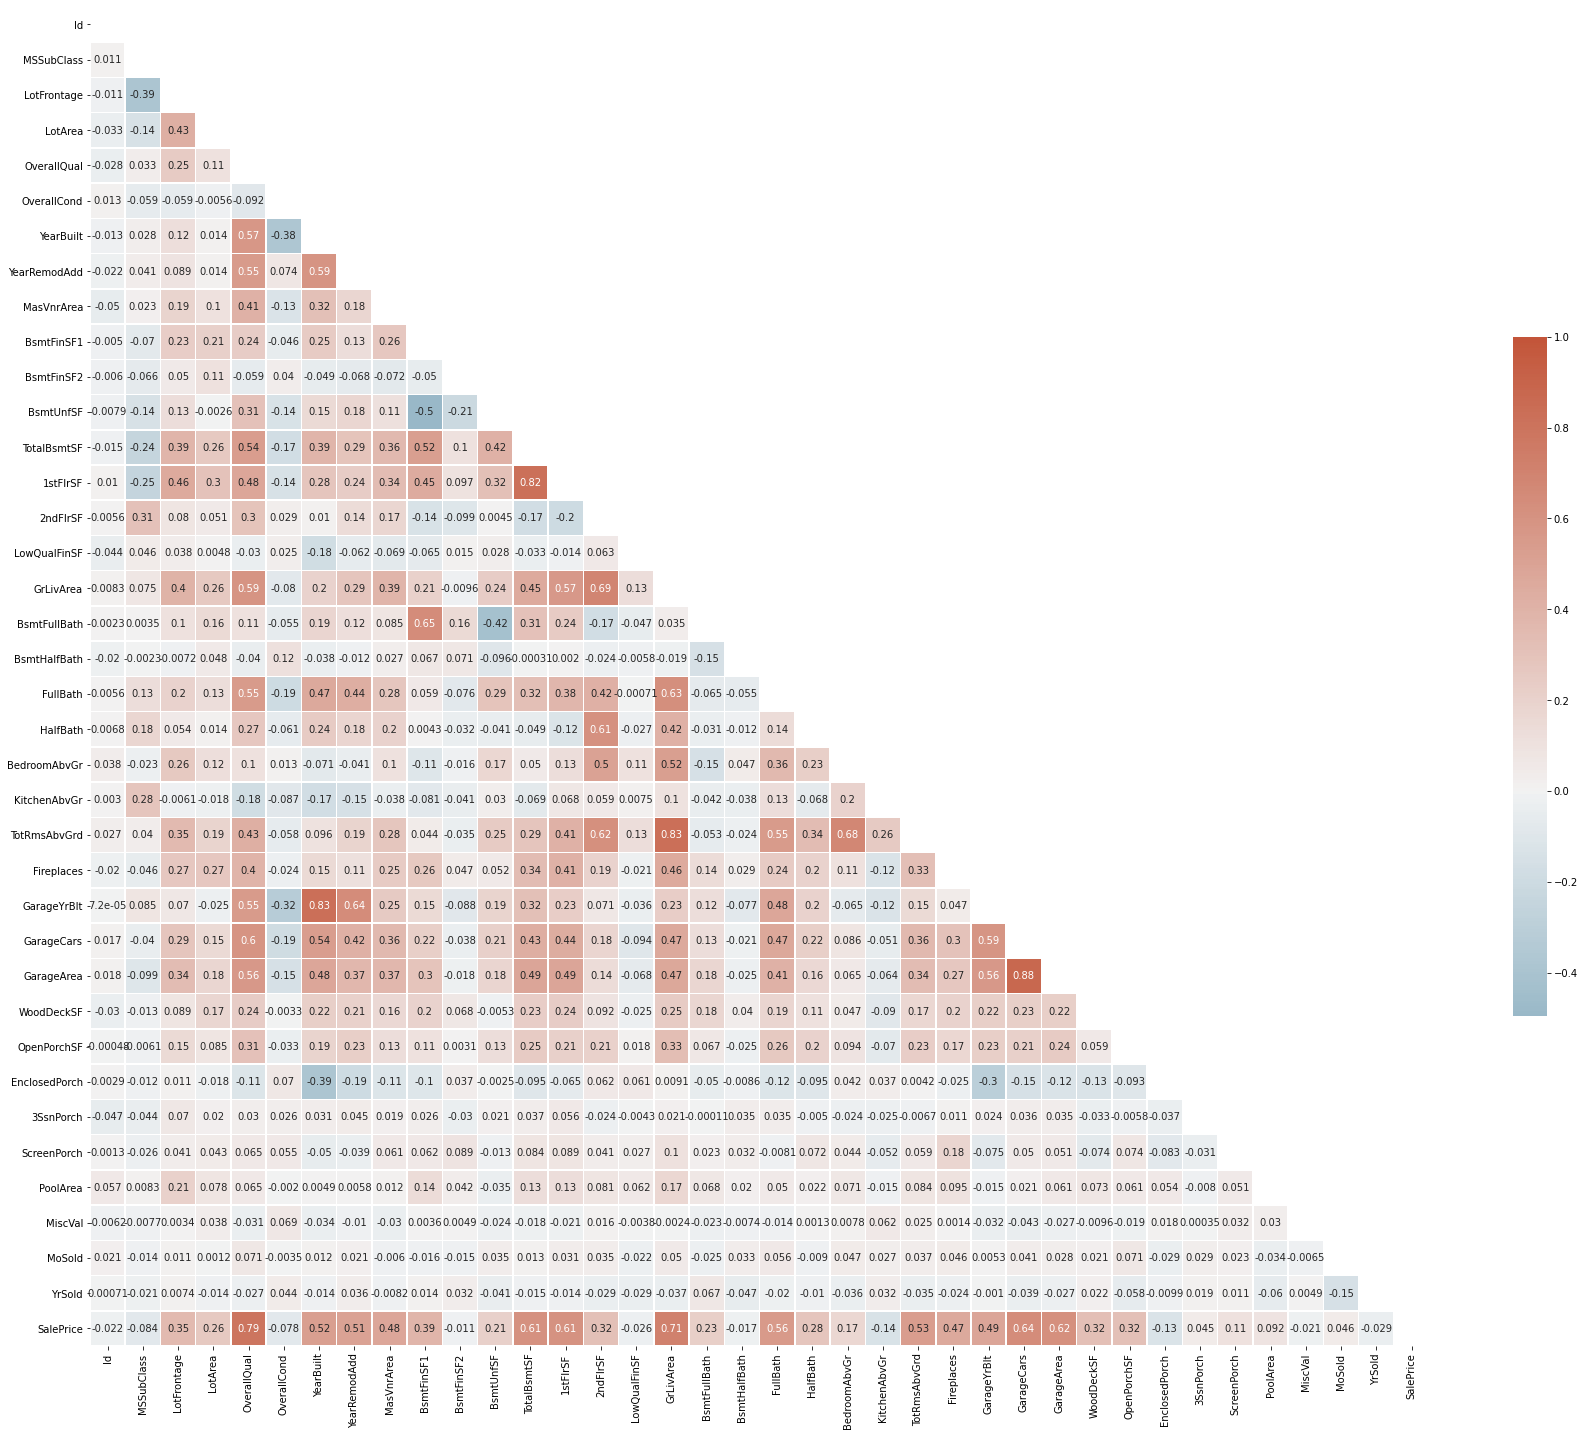

In [4]:
f, ax = plt.subplots(figsize=(30, 25))

mat = train_data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [5]:
mat.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

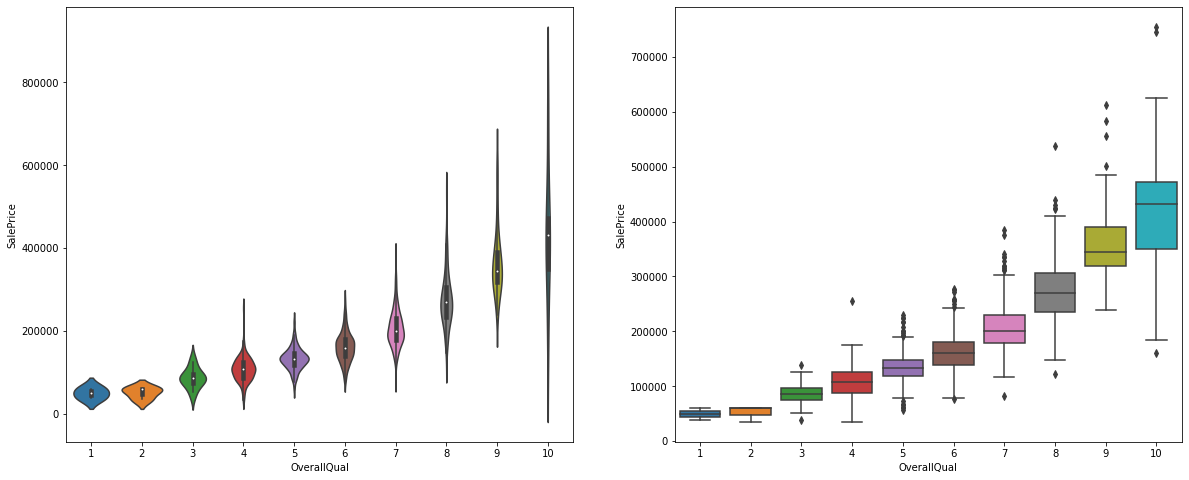

In [6]:
figure, ax = plt.subplots(1,2, figsize = (20,8))
sns.violinplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.boxplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[1])
plt.show()

### Distribution checks

In [7]:
numeric_columns = list(mat.columns[1:-1].values)
categorical_columns = [col for col in data.columns if col not in list(mat.columns.values)]

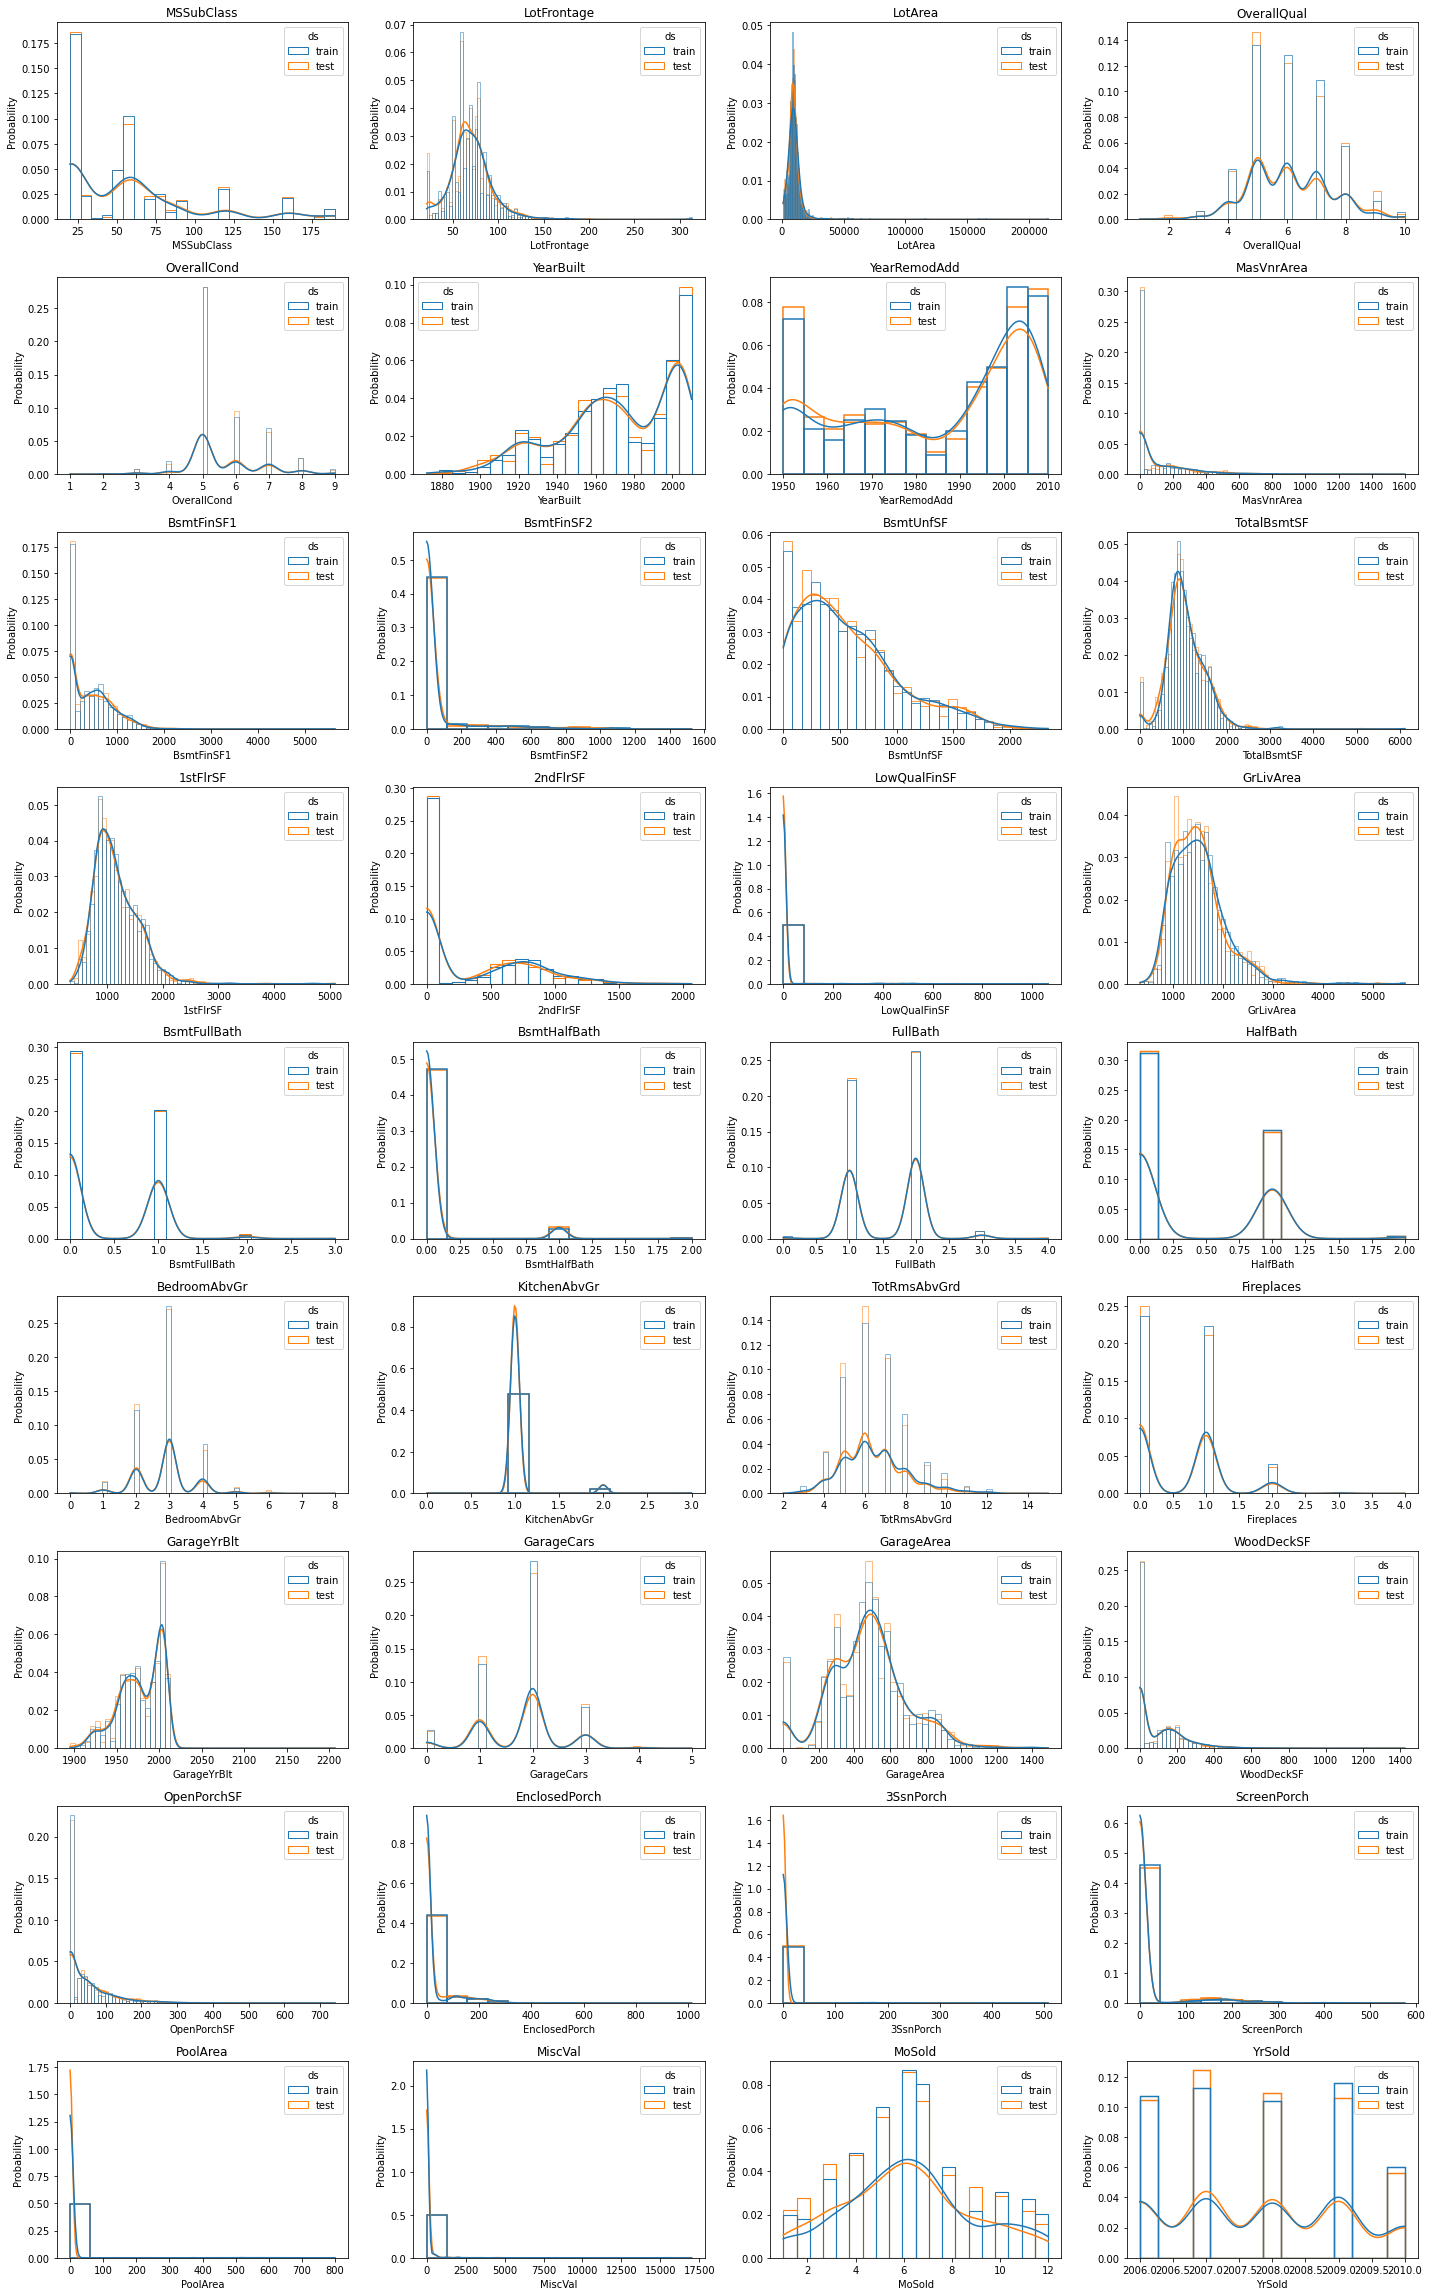

In [8]:
num_rows=9
num_cols=4
fig, ax = plt.subplots(num_rows, num_cols , figsize=(20, 32))
for row in range(num_rows):
    for col in range(num_cols):
        index=row*num_cols+col
        sns.histplot(x=numeric_columns[index], data=data, ax=ax[row][col], hue='ds', stat='probability', kde=True, fill=False).set_title(numeric_columns[index])

plt.tight_layout()      

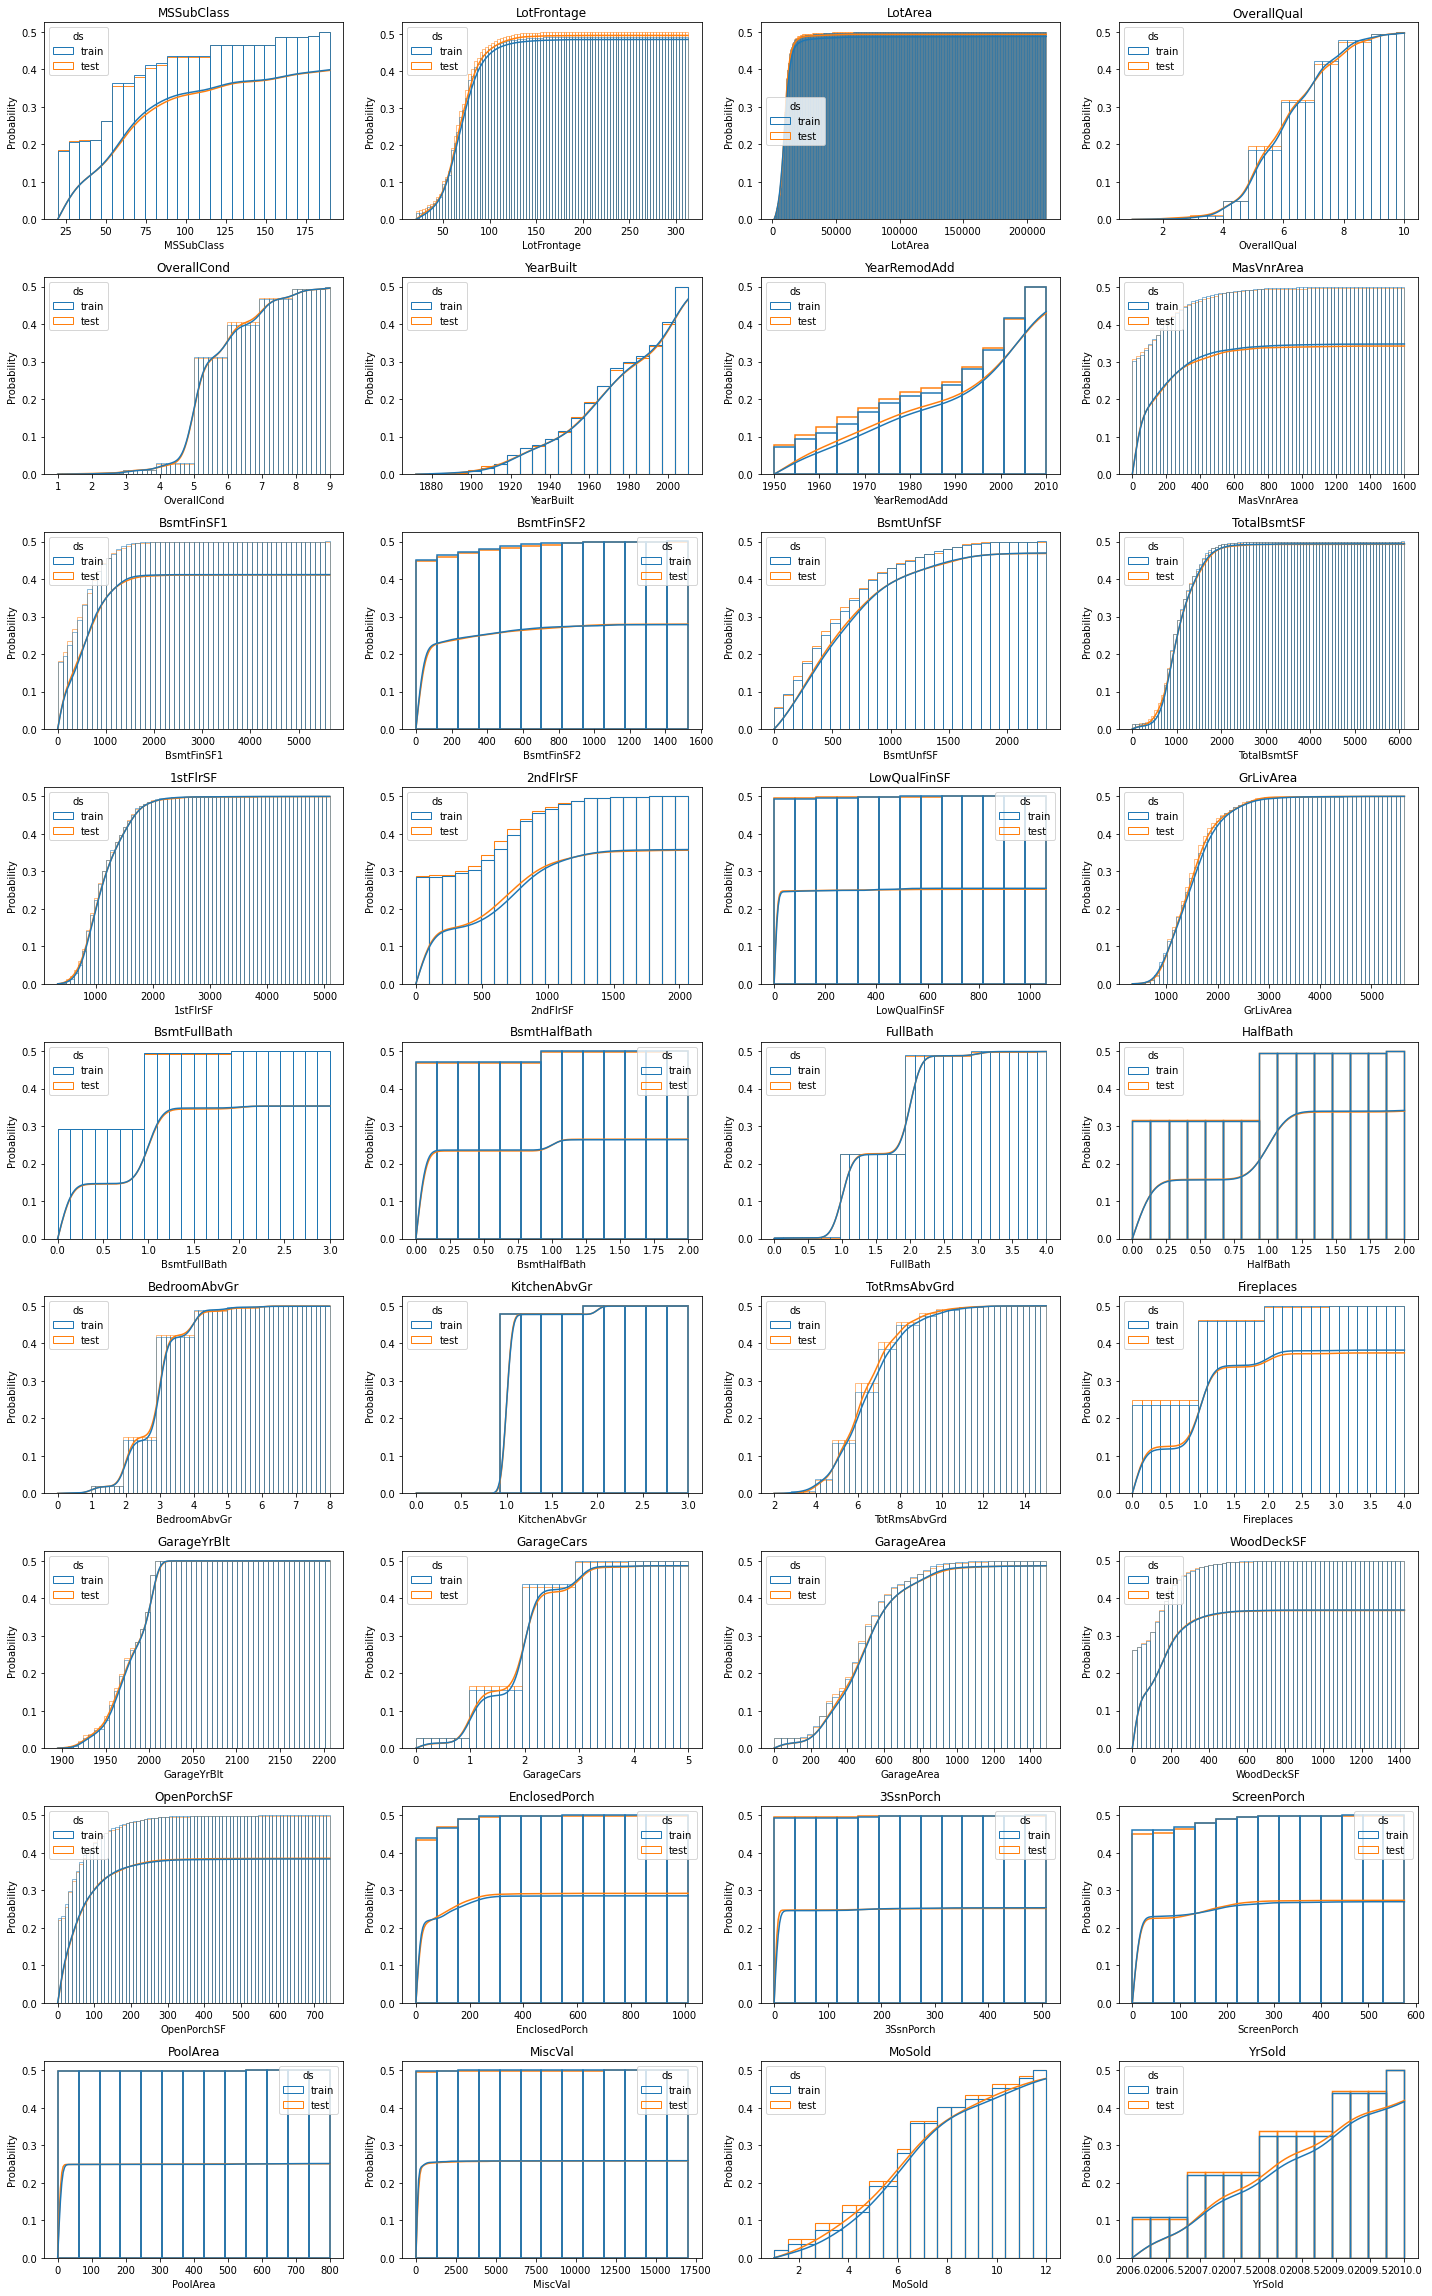

In [13]:
num_rows=9
num_cols=4
fig, ax = plt.subplots(num_rows, num_cols , figsize=(20, 32))
for row in range(num_rows):
    for col in range(num_cols):
        index=row*num_cols+col
        sns.histplot(x=numeric_columns[index], data=data, ax=ax[row][col], hue='ds', stat='probability', kde=True, fill=False, cumulative=True).set_title(numeric_columns[index])

plt.tight_layout()      

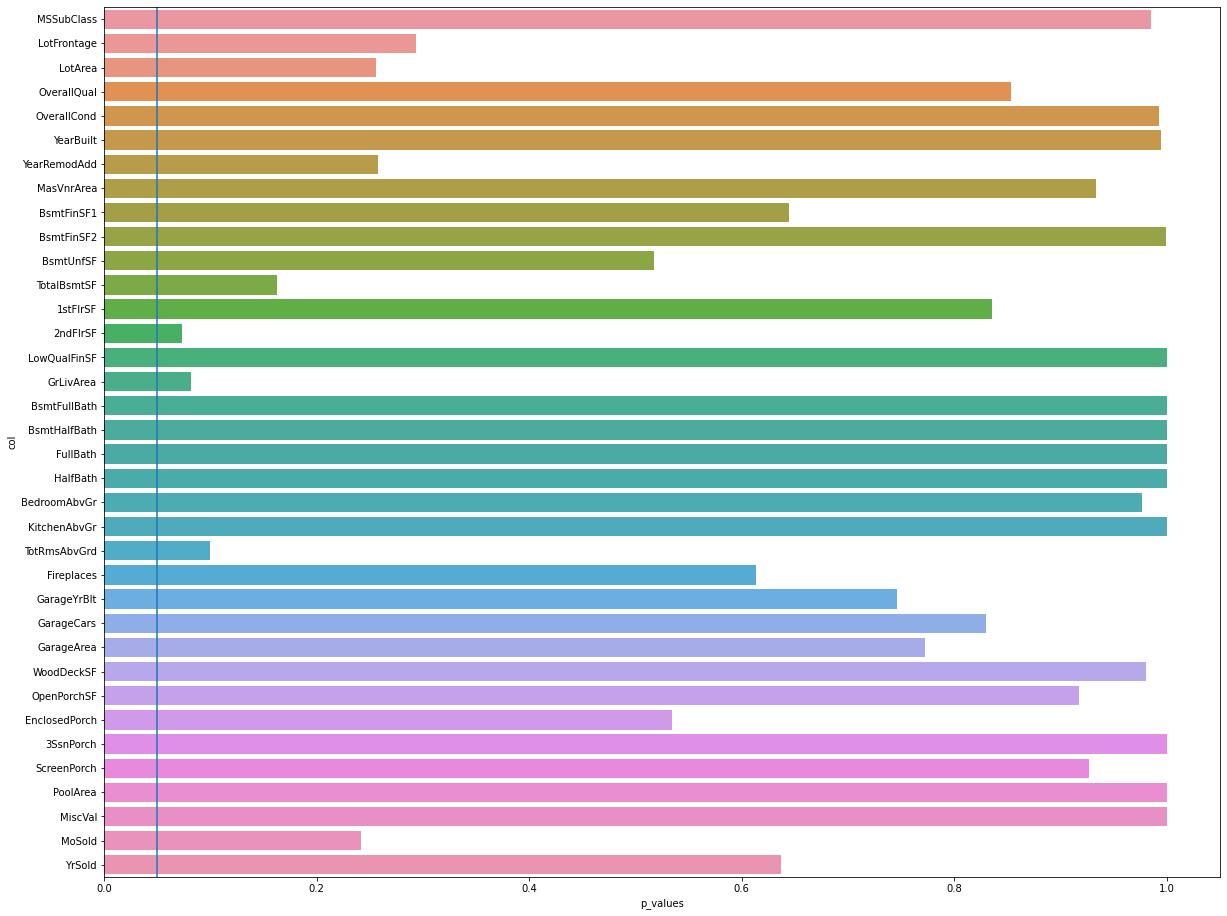

In [32]:
dist_diffs = {'col': [], 'p_values': []}
for ncol in numeric_columns: 
    dist_diffs['col'].append(ncol)
    dist_diffs['p_values'].append(stats.ks_2samp(data[data.ds=='train'][ncol], data[data.ds=='test'][ncol])[1])

plt.figure(figsize=(20, 16))
sns.barplot(y='col', x='p_values', data=pd.DataFrame(dist_diffs))
plt.axvline(0.05);
